In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

# Coin Flip 

In [2]:
def coin_flip():
    return random.randint(0,1)

In [3]:
def monte_carlo(n):
    prob_list = []
    res = 0
    for i in range(n):
        flip_res = coin_flip()
        res += flip_res
        
        prob_val = res / (i + 1)
        prob_list.append(prob_val)
        
    plt.axhline(y = 0.5, color = 'r', linestyle = '-')
    plt.xlabel('Iterations')
    plt.ylabel('Probabilities')
    plt.plot(prob_list)
    
    return res / n

Ans: 0.485


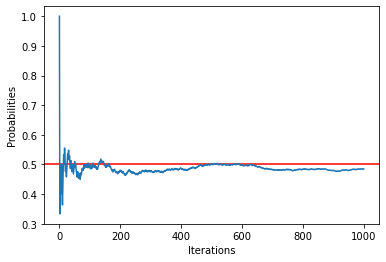

In [4]:
res = monte_carlo(1000)
print('Ans:', res)

# PI

In [5]:
def pi_monte_carlo(n):
    pi_list = []
    in_circle = 0
    out_circle = 0
    for i in range(n):
        x = random.randrange(0, 100)
        y = random.randrange(0, 100)
        if x ** 2 + y ** 2 <= 100 ** 2:
            in_circle += 1
        else:
            out_circle += 1
        
        pi_val = 4.0 * in_circle / (in_circle + out_circle)
        pi_list.append(pi_val)
        
    plt.axhline(y = math.pi, color = 'r', linestyle = '-')
    plt.xlabel('Iterations')
    plt.ylabel('Value of PI')
    plt.plot(pi_list)
    
    return pi_val

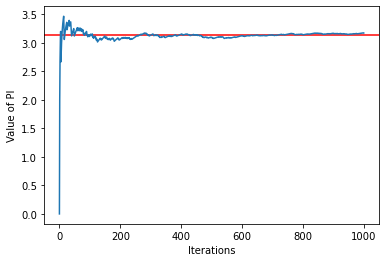

In [6]:
pi_val = pi_monte_carlo(1000)

# Monty Hall Problem

In [7]:
def monty_monte_carlo(n): 
    doors = ['goat', 'car', 'goat']

    swith_win_prob = []
    stick_win_prob = []

    sw_win = 0
    st_win = 0

    for i in range(n):

        random.shuffle(doors)

        select_doors = random.randrange(2)

        if doors[select_doors] != 'car':
            sw_win += 1
        else:
            st_win += 1

        swith_win_prob.append(sw_win / (i + 1))
        stick_win_prob.append(st_win / (i + 1))
        
    plt.axhline(y = 0.6666, color='r', linestyle='-')
    plt.axhline(y = 0.3333, color='g', linestyle='-')
    plt.plot(swith_win_prob)
    plt.plot(stick_win_prob)
    
    return swith_win_prob[-1], stick_win_prob[-1]

Swith win rate: 0.673
Stick win rate: 0.673


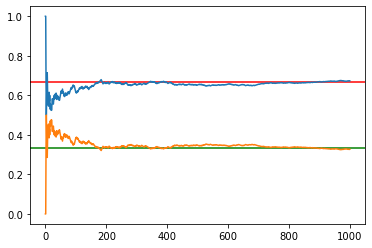

In [8]:
sw_win, st_win = monty_monte_carlo(1000)
print('Swith win rate:', sw_win)
print('Stick win rate:', sw_win)

# Buffon's Needle Problem

In [9]:
def monte_carlo_buffon(itrs, needles, n_length, b_widht):
    pi_values = []
    
    for i in range(itrs):
        nhits = 0
        x = np.random.uniform(0, b_width/2.0, size=(needles,))
        theta = np.random.uniform(0, np.pi/2.0, size=(needles,))

        xtip = x - (n_length / 2.0)*np.cos(theta)

        nhits = sum(xtip < 0)

        pi_values.append((2.0 * n_length * needles) / (b_width * nhits))

    plt.axhline(y=np.pi, color='r', linestyle='-')
    plt.plot(pi_values)
    plt.show()
    
    return pi_values

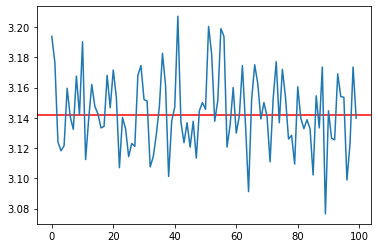

3.1397174254317113


In [10]:
itrs = 100
needles = 10000
n_length = 2
b_width = 2
pi_val = monte_carlo_buffon(itrs, needles, n_length, b_width)
print(pi_val[-1])

# Casino

In [11]:
def casino_montecarlo(total_player, total_play, total_money, even_bet = True):
    
    init_money = total_money * np.ones((total_player)).reshape(-1, 1)
    chip_pick = np.random.randint(1, 100, size=(total_player, total_play))

    result = (chip_pick % 2 == 0) & (chip_pick != 10) if even_bet else (chip_pick % 2 == 1) & (chip_pick != 11)
    result = (result * 2) - 1

    history_money = np.cumsum(np.hstack([init_money,result]), axis=1)

    for i in range(total_player):
        plt.plot(history_money[i,:])
        plt.xlim(0, 1000)
        plt.ylabel('Earn')
        plt.xlabel('Time')
    plt.show()

    return sum(history_money[:, -1]) / total_player

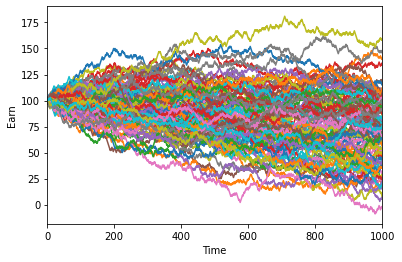

init money: 100
final money: 72.1


In [12]:
total_play = 1000
total_player = 100
total_money = 100

res = casino_montecarlo(total_player, total_play, total_money, even_bet = True)
print('init money:', total_money)
print('final money:', res)